In [51]:
# pip install fancyimpute

In [52]:
# from fancyimpute import SoftImpute,BiScaler     
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np
# from utils import *
# data = load_iris()
from sklearn.datasets import load_digits
# Load the digit dataset
digits = load_digits()

# Create a dataframe from the digits data
df = pd.DataFrame(digits.data)
df['target'] = digits.target
corr_matrix_gt = df.corr()

In [53]:
def randomly_missing(data_input, perc):
    np.random.seed(123)
    data = data_input.copy()
    h, w = data.shape[0], data.shape[1] 
    n = data.shape[0]*data.shape[1] 
    # print(h,w,n)
    # perc = n_sample / n 
    flattenX = data.to_numpy().reshape(1, n)
    mask = np.random.uniform(0,1, size = n) < perc
    flattenX[:, mask] = np.nan 
    return pd.DataFrame(data=flattenX.reshape(h, w),columns=data.columns) 

In [54]:
def randomly_missing_img(data,perc,Type='randomly'):
    '''
    perc : percent of each img -> missing pixel / features
    '''
    result = data.copy()
    def add_noise_to_image(image, p=0.1):
        """
        Adds random noise to an image by randomly replacing some pixels with NaN.

        Args:
            image (ndarray): The input image to add noise to.
            p (float): The probability of replacing each pixel with NaN.

        Returns:
            ndarray: The image with added noise.
        """
        # Copy the input image to avoid modifying the original array
        noisy_image = np.copy(image)

        # Create a mask of the same shape as the input image
        mask = np.random.uniform(size=image.shape)

        # Replace some pixels in the mask with NaN based on the probability p
        mask[mask < p] = np.nan

        # Apply the mask to the input image to create the noisy image
        noisy_image = noisy_image * mask

        return noisy_image

    for i in range(len(data)):
        if Type=='randomly':
            result.iloc[i] = add_noise_to_image(data.iloc[i],p=perc)
    
    return result

In [55]:
def apply_normalize(df):
    output = df.copy()
    # scaler = MinMaxScaler() #StandardNormalize -> 
    scaler = StandardScaler()
    for each in output.columns:
      output[each] = scaler.fit_transform(output[[each]])
    return output

In [56]:
perc = 0.3
new_df = randomly_missing_img(df,perc)
new_df['target'] = digits.target
n_df = apply_normalize(new_df)

In [57]:
# import pandas as pd
# import numpy as np

# data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
#                      columns= data['feature_names'] + ['target'])
# corr_matrix_gt = data1.corr() # grouth truth
# perc = 0.1
# new_df = randomly_missing(data1,perc)
# n_sample = data1.shape[0] * perc
# n_df = apply_normalize(new_df)

In [58]:
# X_incomplete_normalized = BiScaler().fit_transform(n_df)
# n_df_softimpute_1 = SoftImpute().fit_transform(n_df)

In [59]:
# n_df_softimpute_1=pd.DataFrame(n_df_softimpute_1, columns=n_df.columns)

In [60]:
# import seaborn as sns 

# corr_matrix_1 = n_df_softimpute_1.corr()
# sns.heatmap(corr_matrix_1, cmap='coolwarm', annot=True)

In [61]:
# # scaler.py
# # 198 - 199 :row_weights = row_weights.astype('float64')
# # 273 : dtype = X.dtypes
# X_incomplete_normalized = BiScaler().fit_transform(n_df)
# n_df_softimpute_2 = SoftImpute(max_iters=1000).fit_transform(X_incomplete_normalized)
# n_df_softimpute_2 = pd.DataFrame(n_df_softimpute_2, columns=n_df.columns)

In [62]:
# import seaborn as sns 

# corr_matrix_2 = n_df_softimpute_2.corr()
# sns.heatmap(corr_matrix_2, cmap='coolwarm', annot=True)

In [63]:
# X_incomplete_normalized = BiScaler().fit_transform(new_df)
# n_df_softimpute_3 = SoftImpute(max_iters=1000).fit_transform(X_incomplete_normalized)
# n_df_softimpute_3 = pd.DataFrame(n_df_softimpute_3, columns=n_df.columns)

In [64]:
# import seaborn as sns 

# corr_matrix_3 = n_df_softimpute_3.corr()
# sns.heatmap(corr_matrix_3, cmap='coolwarm', annot=True)

In [65]:
def covariance_rmse(cov_matrix1, cov_matrix2):
    std1 = np.sqrt(np.diag(cov_matrix1))
    corr_matrix1 = cov_matrix1 / np.outer(std1, std1)

    std2 = np.sqrt(np.diag(cov_matrix2))
    corr_matrix2 = cov_matrix2 / np.outer(std2, std2)
    diff = corr_matrix1 - corr_matrix2
    squared_diff = np.square(diff)

    mean_squared_diff = np.mean(squared_diff)
    rmse = np.sqrt(mean_squared_diff)

    nan_mask = np.isnan(rmse)
    if np.any(nan_mask):
        # Remove NaN elements from rmse and print a message
        nan_indices = np.where(nan_mask)[0]
        print(f"Elements {nan_indices} are NaN and will be removed.")
        rmse = rmse[~nan_mask]

    total_rmse = (1/len(rmse)) * sum(rmse) 
    print("Total : ",total_rmse)
    return rmse

In [66]:
# # soft impute only
# covariance_rmse(corr_matrix_gt, corr_matrix_1)

In [67]:
# # biscaler (not normalize )+ soft impute
# covariance_rmse(corr_matrix_gt, corr_matrix_2)

In [68]:
# # biscaler (normalize)+ soft impute
# covariance_rmse(corr_matrix_gt, corr_matrix_3)

In [69]:
import numpy.ma as ma
# https://github.com/terencechow/PCA
def svdtriplet(X,roww=[],colw=[],ncp=np.inf):
	if hasattr(X,'pop'):
		X=np.array(X,float)
	elif hasattr(X,'shape'):
		X=X.astype(float)
	else:
		print("Please use a numpy array or a list!")
		return
	if roww==[]:
		roww = np.array(np.ones(X.shape[0])/X.shape[0],float)
	else:
		roww = np.array(roww,dtype=float)
	if colw==[]:
		colw = np.array(np.ones(X.shape[1]),float)
	else:
		colw = np.array(colw,dtype=float)

	ncp = min(ncp,X.shape[0]-1,X.shape[1])
	roww /= roww.sum()
	X *= np.sqrt(colw)
	X *= np.sqrt(roww[:,None])
	U = np.array([])
	s = np.array([])
	V = np.array([])

	if X.shape[1]<X.shape[0]:
		U, s, V = np.linalg.svd(X,full_matrices=False)
		V = V.T
		U = U[:,:ncp]
		V = V[:,:ncp]
		if ncp>1:
			mult = np.sign(V.sum(axis=0))
			mult[mult==0]=1
			U *= mult
			V *= mult
		U /= np.sqrt(roww[:,None])
		V /= np.sqrt(colw[:,None])
	else:
		V, s, U = np.linalg.svd(X.T,full_matrices=False)
		U = U.T
		U = U[:,:ncp]
		V = V[:,:ncp]
		mult = np.sign(V.sum(axis=0))
		mult[mult==0]=1	
		V *= mult
		U *= mult
		U /= np.sqrt(roww[:,None])
		V /= np.sqrt(colw[:,None])

	s = s[:min(X.shape[1],X.shape[0]-1)]
	num = s[:ncp] <1e-15
	if num.sum() >=1:
		U[:,num] *= s[num]
		V[:,num] *= s[num]

	return s,U,V

def imputePCA(X,ncp=2,scale=True,method=['Regularized','EM'],roww=[],coeffridge=1,threshold=1e-6,seed=None,nbinit=1,maxiter=1000):

	"""
	This will return a list of 2 numpy arrays. 
	The first array is what the data is with imputed values replacing the missing values 
	and the second numpy array is what the data would look like if all values were imputed.
	"""
	def impute(X_input,mx,ncp=4,scale=True,method=None,threshold=1e-6,seed=None,init=1,maxiter=1000,roww=None,coeffridge=1):
		X = X_input.copy()
		nbiter = 1
		old = np.inf
		objective = 0
		if seed is not None:
			np.random.seed = seed
		ncp = min(ncp,X.shape[1],X.shape[0]-1)

		means = ma.average(mx,axis=0,weights=roww).data
		Xhat = X - means
		rows = ma.masked_array(np.vstack([roww]*mx.shape[1]).T,mask=mx.mask)
		standardize = np.sqrt(np.nansum(Xhat**2*roww[:,None],axis=0)/rows.sum(axis=0))
		if scale:
			Xhat/=standardize.data
		Xhat[mx.mask]=0
		if init >1:
			Xhat[mx.mask]=np.random.randn(mx.mask.sum())
		recon = Xhat.copy()
		
		if ncp==0: 
			nbiter=0
		while nbiter>0:
			Xhat[mx.mask] = recon[mx.mask]
			if scale:
				Xhat*=standardize
			Xhat+=means
			means = np.average(Xhat,axis=0,weights=roww)
			Xhat-=means
			standardize = np.sqrt(np.nansum(Xhat**2*roww[:,None],axis=0)/roww.sum())
			if scale:
				Xhat/=standardize
			s,U,V = svdtriplet(Xhat,roww=roww)
			sigma2 = np.mean(s[ncp:]**2)
			sigma2 = min(sigma2*coeffridge,s[ncp]**2)
			if 'em' in method:
				sigma2 = 0
			lambdashrinked = (s[:ncp]**2-sigma2)/s[:ncp]
			recon = np.dot(U[:,:ncp]*roww[:,None]*lambdashrinked,V[:,:ncp].T)
			recon /= roww[:,None]
			diff = Xhat-recon
			diff[mx.mask] = 0
			objective = np.sum(diff**2*roww[:,None])
			criterion = abs(1-objective/old)
			old = objective
			nbiter +=1
			if criterion is not None:
				if criterion < threshold and nbiter > 5:
					nbiter = 0
					print ("Stopped after criterion < threshold")
				if objective < threshold and nbiter > 5:
					nbiter = 0
					print ("Stopped after objective < threshold")
			if nbiter > maxiter:
				nbiter = 0
				print ("Stopped after " + str(maxiter) + " iterations")
		if scale:
			Xhat*=standardize
		Xhat+=means
		completeObs = X.copy()
		completeObs[mx.mask] = Xhat[mx.mask]
		if scale:
			recon*=standardize
		recon+=means
		result = [completeObs,recon]
		return result

    ### Impute function done now for rest of impute PCA function
	if hasattr(X,'values'):
		X = X.values.astype(float)
	elif hasattr(X,'shape'):
		X = X.astype(float)
	elif hasattr(X,'pop'):
		X = np.array(X,float)
	else:
		print ("X must be a list, pandas or numpy array")
		return
	method = method[0]
	obj = np.inf
	method = method.lower()
	imputed = np.array([])
	if ncp>min(X.shape[0]-2,X.shape[1]-1):
		print ("Stopping, ncp too large")
		return
	if roww == []:
		roww = np.ones(X.shape[0])/X.shape[0]
	else:
		if hasattr(roww,'pop'):
			roww = np.array(roww)
		elif hasattr(roww,'shape'):
			pass
		else:
			"roww is not a list or numpy array!"
			return
	if np.isnan(np.sum(X)):
		mx = ma.masked_array(X,mask=np.isnan(X))

	for i in range(0,nbinit):
		if ~np.isnan(np.sum(X)):
			return X
		if seed != None:
			seed=seed*i
		else:
			seed = None
		imputeit = impute(X,mx=mx,ncp=ncp,scale=scale,method=method,threshold=threshold,seed=seed,init=i+1,maxiter=maxiter,roww=roww,coeffridge=coeffridge)
		if np.mean((imputeit[1][~mx.mask]-X[~mx.mask])**2) <obj:
			imputed = imputeit
			obj = np.mean((imputeit[1][~mx.mask]-X[~mx.mask])**2)
	return imputed

def estim_ncpPCA(X,ncpmin=0,ncpmax=5,method='regularized',scale=True,cv='gcv',nbsim=100,pNA=0.05,threshold=1e-4):

	if hasattr(X,'values'):
		X = X.values.astype(float)
	elif hasattr(X,'shape'):
		X = X.astype(float)
	elif hasattr(X,'pop'):
		X = np.array(X,float)
	else:
		print ("X must be a list, pandas or numpy array")
		return
	
	method = method.lower()
	cv = cv.lower()
	Xhat = np.array([],float)
	ncpmax = min(ncpmax,X.shape[1]-1,X.shape[0]-2)
	result = []
	
	if cv=='gcv':
		p = X.shape[1]
		n = X.shape[0]
		if ncpmax is None:
			ncpmax = X.shape[1]-1
		ncpmax = min(X.shape[0]-2,X.shape[1]-1,ncpmax)
		crit = []
		if ncpmin == 0:
			mx = ma.masked_array(X,mask=np.isnan(X))
			crit.append(np.mean((mx - np.hstack([[np.mean(mx,axis=0).data]*X.shape[0]]))**2))


		for q in range(max(ncpmin,1),ncpmax+1):
			rec = imputePCA(X,scale=scale,ncp=q,method=method,maxiter=1000)[1]

			crit.append(np.mean(((n*p - mx.mask.sum())*(mx-rec)/((n-1)*p - mx.mask.sum() - q*(n+p-q-1)))**2))
		
		ncp = None
		if np.any(np.ediff1d(crit)>0):
			ncp = np.argmax(np.ediff1d(crit)>0)
		else:
			ncp = np.argmin(crit)
		return [ncp,crit]
		
	if cv =='loo':
		res = []
		for nbaxes in range(ncpmin,ncpmax+1):
			Xhat = ma.masked_array(X,copy=True,mask=np.isnan(X))

			it = np.nditer(X,flags=['multi_index'])
			while not it.finished:
				if ~np.isnan(X[it.multi_index[0],it.multi_index[1]]):
					mXNA = ma.masked_array(X,copy=True,mask=np.isnan(X))
					mXNA.mask[it.multi_index[0],it.multi_index[1]]=True
					mXNA.data[it.multi_index[0],it.multi_index[1]]=None
					if nbaxes==0:
						Xhat[it.multi_index[0],it.multi_index[1]] = ma.mean(mXNA[:,it.multi_index[1]])
					else:
						Xhat[it.multi_index[0],it.multi_index[1]] = imputePCA(mXNA.data,ncp=nbaxes,threshold=threshold,method=method,scale=scale)[0][it.multi_index[0],it.multi_index[1]]
				it.iternext()
			res.append(((Xhat-X)**2).mean())
		result = [np.argmin(res)+ncpmin,res]


	if cv == 'kfold':
		res = np.empty((ncpmax-ncpmin+1,nbsim))
		for sim in range(1,nbsim):
			mXNA = ma.masked_array(X,copy=True,mask=np.isnan(X))
			rowsRandom = np.random.random_integers(0,mXNA.shape[0]-1,mXNA.shape[0])
			colsRandom = np.random.random_integers(0,mXNA.shape[1]-1,mXNA.shape[0])
			mXNA.mask[[rowsRandom,colsRandom]]=True
			mXNA.data[[rowsRandom,colsRandom]]=None
			for nbaxes in range(ncpmin,ncpmax+1):
				if nbaxes==0:
					Xhat=mXNA.filled(mXNA.mean(axis=0))
				else:
					Xhat = imputePCA(mXNA.data,ncp=nbaxes,threshold=threshold,method=method,scale=scale)[0]
				res[nbaxes-ncpmin,sim] = np.nansum((Xhat-X)**2)
		resmeans = res.mean(axis=1)
		result = [np.argmin(resmeans)+ncpmin,resmeans]
	return result


In [70]:
# estim_ncpPCA(n_df,scale=False)

In [71]:
# pca = imputePCA(n_df,ncp=3, scale=False,method=['Regularized'],seed=123) 

In [72]:
# from sklearn.metrics import mean_squared_error as mse
# mse(pca[0],pca[1])

In [73]:
# pca = pd.DataFrame(pca[0], columns=n_df.columns)

In [74]:
# corr_matrix_pca = pca.corr()
# sns.heatmap(corr_matrix_pca, cmap='coolwarm', annot=True)

In [75]:
# covariance_rmse(corr_matrix_gt, corr_matrix_pca)

In [76]:
def min_max_scale(x):
    cols = x.shape[1]
    min_record = []
    max_record = []

    for col in range(cols):
        min_val= np.min(x[:,col])
        max_val = np.max(x[:,col])
        x[:,col] = (x[:,col] - min_val)/(max_val - min_val)
        min_record.append(min_val)
        max_record.append(max_val)

    return x, min_record,max_record

def zero_score_scale(x):
    cols = x.shape[1]
    for col in range(cols):
        x[:,col] = (x[:,col]-np.mean(x[:,col]))/(np.std(x[:,col]))

    return x

def min_max_recover(X, min_vec, max_vec):
    cols = X.shape[1]
    for col in range(cols):
        X[:,col] = X[:,col]*(max_vec[col]-min_vec[col])+min_vec[col]
    return X


NORMALIZERS = {'min_max':min_max_scale,
                'zero_score':zero_score_scale}

RECOVER = {'min_max':min_max_recover}

In [77]:
class Solver(object):
    def __init__(self,
                 init_fill_method='zero',
                 normalizer = None,
                 ):

        self.fill_method = init_fill_method
        self.normalizer = normalizer

    def __repr__(self):
        return str(self)

    def __str__(self):
        field_list = []
        for (k, v) in sorted(self.__dict__.items()):
            if v is None or isinstance(v, (float, int)):
                field_list.append("%s=%s" % (k, v))
            elif isinstance(v, str):
                field_list.append("%s='%s'" % (k, v))
        return "%s(%s)" % (
            self.__class__.__name__,
            ", ".join(field_list))

    def _check_input(self, X):
        if len(X.shape) != 2:  # Note that ndarray's shpe is a tuple like (rows, cols)
            raise ValueError("Expected 2d matrix, got %s array" % (X.shape,))

    def _check_missing_value_mask(self, missing_mask):
        """
        check whether your wait-imputation data contains null value
        :param missing: missing totally as your 'mask', an numpy array.
        :return:raise error
        """
        if isinstance(missing_mask, pd.DataFrame):
            missing_mask = missing_mask.values
        if not missing_mask.any():
            raise ValueError("Input matrix is not missing any values")
        if missing_mask.all():
            raise ValueError("Input matrix must have some non-missing values")

    def _judge_type(self, X):
        coltype_dic = {}
        for col in range(X.shape[1]):
            col_val = X[:, col]
            nan_index = np.where(pd.isnull(col_val))
            col_val = np.delete(col_val, nan_index)

            if len(np.unique(col_val)) / len(col_val) < 0.05 and (np.any(col_val == col_val.astype(int))):
                coltype_dic[col] = 'categorical'
            else:
                coltype_dic[col] = 'continuous'
        return coltype_dic

    def solve(self, X,missing_mask):
        """
        Given an initialized matrix X and a mask of where its missing values
        had been, return a completion of X.
        """
        raise ValueError("%s.solve not yet implemented!" % (
            self.__class__.__name__,))

    def complete(self, x):
        """
        Expects 2d float matrix with NaN entries signifying missing values
        Returns completed matrix without any NaNs.
        """
        self._check_input(x)
        self._check_missing_value_mask(pd.isnull(x))
        x, missing_mask = self.prepare_input_data(x)

        x_zero_replaced = self.fill(x.copy(),missing_mask,'zero')
        if self.normalizer is not None:
            normalizer = NORMALIZERS[self.normalizer]
            x_zero_replaced, min_record, max_record = normalizer(x_zero_replaced)

        x_filled = self.solve(x_zero_replaced, missing_mask)
        revocer = RECOVER[self.normalizer]
        x_filled = revocer(x_filled, min_record, max_record)
        return x_filled


    def sort_col(self, mask):
        """
        count various cols, the missing value wages,
        :param X: the original data matrix which is waiting to be imputed
        :return: col1, col2,.... colx, those cols has been sorted according its status of missing values
        """
        nan_index = np.where(mask == True)[1]
        unique = np.unique(nan_index)
        nan_index = list(nan_index)
        dict = {}
        for item in unique:
            count = nan_index.count(item)
            dict[item] = count
        tmp = sorted(dict.items(), key=lambda e: e[1], reverse=True)
        sort_index = []
        for item in tmp:
            sort_index.append(item[0])
        return sort_index

    def get_type_index(self, mask_all, col_type_dict):
        """
        get the index of every missing value, because the imputed array is 1D
        where the continuous and categorical index are needed.
        :param mask_all:
        :param col_type_dict:
        :return: double list
        """
        where_target = np.argwhere(mask_all == True)
        imp_categorical_index = []
        imp_continuous_index = []
        for index in where_target:
            col_type = col_type_dict[index[1]]
            if col_type == 'categotical':
                imp_categorical_index.append(index)
            elif col_type == 'continuous':
                imp_continuous_index.append(index)

        return imp_continuous_index, imp_categorical_index

    @staticmethod
    def _fill_column_with_fn(X, missing_mask, method):
        """
        :param X: numpy array, the data which waiting to be imputation
        :param missing_mask:numpy array
        :param method: the way of what kind of normal imputation algorithm you use
        :return:
        """
        n_missing = missing_mask.sum()  # np.sum() which could calculate the number of 'TRUE'
        if n_missing == 0:
            return X

        if method == 'frequency':
            unique, counts = np.array(np.unique(X[~np.isnan(X)], return_counts=True))
            fill_values = np.random.choice(unique, size=np.count_nonzero(np.isnan(X)), p=counts / np.sum(counts))
        else:
            fill_values = method(X)
        X[missing_mask] = fill_values

        return X

    def fill(self, X, missing_mask, fill_method=None):
        """
        Parameters
        ----------
        X : np.array or pandas.DataFrame
            Data array containing NaN entries
        missing_mask : np.array
            Boolean array indicating where NaN entries are
            matrix like: [[T,F,T T],
                          [F,T,T,T]
                          [.......]]
        fill_method : str
            "zero": fill missing entries with zeros
            "mean": fill with column means
            "median" : fill with column medians
            "min": fill with min value per column
            "random": fill with gaussian samples according to mean/std of column
        inplace : bool
            Modify matrix or fill a copy
        """
        if not fill_method:
            fill_method = self.fill_method

        if fill_method not in ("zero", "mean", "median", "min", "random", "frequency"):
            raise ValueError("Invalid fill method: '%s'" % (fill_method))
        elif fill_method == "zero":
            # replace NaN's with 0
            X[missing_mask] = 0  # this is the match data feature of numpy array
        elif fill_method == "mean":
            self._fill_column_with_fn(X, missing_mask, np.nanmean)
        elif fill_method == "median":
            self._fill_column_with_fn(X, missing_mask, np.nanmedian)
        elif fill_method == "min":
            self._fill_column_with_fn(X, missing_mask, np.nanmin)
        elif fill_method == "frequency":
            self._fill_column_with_fn(X, missing_mask, "frequency")
        return X

    def prepare_input_data(self, X):
        """
        Check to make sure that the input matrix and its mask of missing
        values are valid. Returns X and missing mask.
        """
        X = np.asarray(X)
        if X.dtype != "f" and X.dtype != "d":
            X = X.astype(float)

        self._check_input(X)
        missing_mask = np.isnan(X)
        self._check_missing_value_mask(missing_mask)
        return X, missing_mask

    def split(self, X, target_col, mask):
        col_mask = mask[:,target_col]
        nan_index = np.where(col_mask == True)
        not_nan_index = np.where(col_mask == False)

        contain_nan_rows = np.delete(X, not_nan_index, 0)
        no_contain_nan_rows = np.delete(X, nan_index, 0)

        train_X = np.delete(no_contain_nan_rows, target_col, 1)
        train_y = no_contain_nan_rows[:, target_col]
        test_X = np.delete(contain_nan_rows, target_col, 1)

        return train_X, train_y, test_X

    @staticmethod
    def _get_missing_loc(missing_mask):
        missing_tuple = np.where(missing_mask)
        missing_row = missing_tuple[0]
        missing_col = missing_tuple[1]
        location = zip(missing_row, missing_col)
        return location, missing_row, missing_col

    @staticmethod
    def _pure_data(data, missing_mask):
        """
        pure a completely data set from data
        :param data: a matrix which contains missing value
        :param missing_mask:
        :return: a complete data set
        """
        missing_rows = np.where(missing_mask)[0]
        pure_data = np.delete(data, missing_rows, axis=0)

        return pure_data

    def _is_mix_type(self, X):
        mask_dict = self.masker(X)
        categorical_count = 0
        continuous_count = 0
        for col in range(X.shape[1]):
            col_type = mask_dict[col]
            if col_type == 'categotical':
                categorical_count += 1
            elif col_type == 'continuous':
                continuous_count += 1

        if categorical_count == 0 and continuous_count != 0:
            return 'continuous'
        elif categorical_count != 0 and continuous_count == 0:
            return 'categotical'
        elif categorical_count != 0 and continuous_count != 0:
            return 'mix'
        else:
            raise ("unkonwn col type")

    @staticmethod
    def extract_imp_data_by_col(filled_X, required_cols, col_mask):
        x_imp = []
        for col in required_cols:
            nan_val = filled_X[:, col][col_mask[col]]
            for item in nan_val:
                x_imp.append(item)
        return x_imp

    def detect_complete_part(self, missing_mask):
        complete_rows = []
        missing_rows = []
        for idx, row in enumerate(missing_mask):
            if (row == False).all():
                complete_rows.append(idx)
            else:
                missing_rows.append(idx)

        return np.asarray(complete_rows), np.asarray(missing_rows)

def generate_noise(n_rows, n_cols):
    """
    generate noise matrix
    """
    return np.random.uniform(0., 1., size=[n_rows, n_cols])

In [78]:
import copy
from tqdm import tqdm
class EM(Solver):
    """
    this algorithm just require to lean the Gauss distribution elements 'mu' and 'sigma'
    """
    def __init__(self,
                 max_iter=100,
                 theta=1e-9,
                 normalizer='min_max'):
        Solver.__init__(self,
                        normalizer=normalizer)

        self.max_iter = max_iter
        self.theta = theta

    def _init_parameters(self, X):
        rows, cols = X.shape
        mu_init = np.nanmean(X, axis=0)
        sigma_init = np.zeros((cols, cols))
        for i in range(cols):
            for j in range(i, cols):
                vec_col = X[:, [i, j]]
                vec_col = vec_col[~np.any(np.isnan(vec_col), axis=1), :].T
                if len(vec_col) > 0:
                    cov = np.cov(vec_col)
                    cov = cov[0, 1]
                    sigma_init[i, j] = cov
                    sigma_init[j, i] = cov

                else:
                    sigma_init[i, j] = 1.0
                    sigma_init[j, i] = 1.0

        return mu_init, sigma_init

    def _e_step(self, mu,sigma, X):
        samples,_ = X.shape
        for sample in range(samples):
            if np.any(np.isnan(X[sample,:])):
                loc_nan = np.isnan(X[sample,:])
                new_mu = np.dot(sigma[loc_nan, :][:, ~loc_nan],
                                np.dot(np.linalg.inv(sigma[~loc_nan, :][:, ~loc_nan]),
                                       (X[sample, ~loc_nan] - mu[~loc_nan])[:,np.newaxis]))
                nan_count = np.sum(loc_nan)
                X[sample, loc_nan] = mu[loc_nan] + new_mu.reshape(1,nan_count)

        return X

    def _m_step(self,X):
        rows, cols = X.shape
        mu = np.mean(X, axis=0)
        sigma = np.cov(X.T)
        tmp_theta = -0.5 * rows * (cols * np.log(2 * np.pi) +
                                  np.log(np.linalg.det(sigma)))

        return mu, sigma,tmp_theta



    def solve(self, X, missing_mask):
        mu, sigma = self._init_parameters(X)
        complete_X,updated_X = None, None
        rows,_ = X.shape
        theta = -np.inf
        for iter in tqdm(range(self.max_iter)):
            updated_X = self._e_step(mu=mu, sigma=sigma, X=copy.copy(X))
            mu, sigma, tmp_theta = self._m_step(updated_X)
            for i in range(rows):
                tmp_theta -= 0.5 * np.dot((updated_X[i, :] - mu),
                                          np.dot(np.linalg.inv(sigma), (updated_X[i, :] - mu)[:, np.newaxis]))
            if abs(tmp_theta-theta)<self.theta:
                complete_X = updated_X
                break
            else:
                theta = tmp_theta
        else:
            complete_X = updated_X

        return complete_X

In [83]:
em = EM(max_iter=100,theta=-1e-9).complete(n_df)

/tmp/ipykernel_3463/480528230.py:9: RuntimeWarning: invalid value encountered in divide
  x[:,col] = (x[:,col] - min_val)/(max_val - min_val)
/tmp/ipykernel_3463/1746463000.py:19: RuntimeWarning: Mean of empty slice
  mu_init = np.nanmean(X, axis=0)
/home/pn7hao/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/pn7hao/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/tmp/ipykernel_3463/1746463000.py:26: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(vec_col)
/home/pn7hao/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/pn7hao/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_di

In [80]:
em = pd.DataFrame(em,columns=n_df.columns)

<AxesSubplot: >

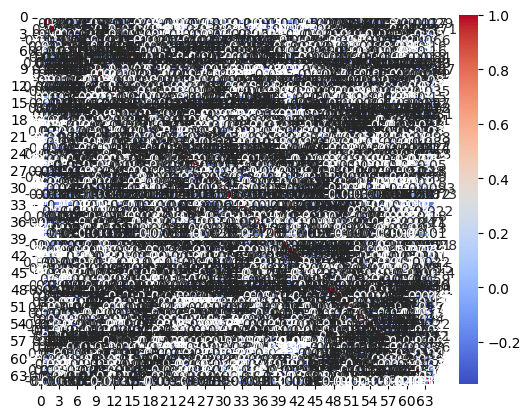

In [81]:
import seaborn as sns

corr_matrix_em = em.corr()
sns.heatmap(corr_matrix_em, cmap='coolwarm', annot=True)

In [82]:
covariance_rmse(corr_matrix_gt, corr_matrix_em)

Elements [ 0 32 39] are NaN and will be removed.
Total :  0.08207389104437716


/home/pn7hao/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


1         0.076357
2         0.116671
3         0.123593
4         0.065616
5         0.091320
            ...   
60        0.097990
61        0.096263
62        0.086860
63        0.066947
target    0.040302
Length: 62, dtype: float64

In [1]:
import requests 
import time
url = "https://thuvienphapluat.vn/hoi-dap-phap-luat/54D3E-hd-quyet-dinh-ve-dac-xa-va-quyet-dinh-dac-xa-co-phai-la-mot.html"

start = time.time()
req = requests.get(url)
end = time.time() - start
end

2.3976523876190186

In [6]:
2.6 * 50_000 / (60*60) 

36.111111111111114

In [2]:
import faster_than_requests as requests
import time
url = "https://thuvienphapluat.vn/hoi-dap-phap-luat/54D3E-hd-quyet-dinh-ve-dac-xa-va-quyet-dinh-dac-xa-co-phai-la-mot.html"

start = time.time()
req = requests.get(url)
end = time.time() - start
end

2.071392774581909

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import seaborn as sns

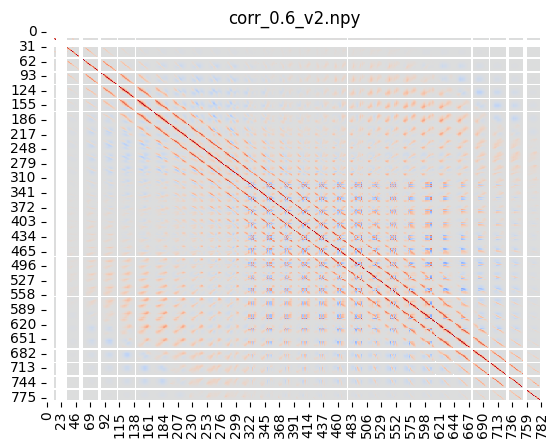

In [3]:
path = 'experiments/Corr/MNIST/GAIN/'
vis = ['corr_0.4_v2.npy',
        'corr_0.5_v2.npy',
        'corr_0.6_v2.npy'
        ]

for i in vis:
    corr = np.load(path+i)
    im = sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,cbar=False)
    plt.title(i)
    plt.plot()